# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 589


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
# for i, city in enumerate(cities[:3]):
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}&q={city}'

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})


    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waingapu
Processing Record 2 of Set 1 | hibbing
Processing Record 3 of Set 1 | port elizabeth
Processing Record 4 of Set 1 | namtsy
Processing Record 5 of Set 1 | chernyshevskiy
Processing Record 6 of Set 1 | karratha
Processing Record 7 of Set 1 | hayma'
City not found. Skipping...
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | quellon
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | mata-utu
Processing Record 12 of Set 1 | petropavlovsk-kamchatsky
Processing Record 13 of Set 1 | hawaiian paradise park
Processing Record 14 of Set 1 | anadyr
Processing Record 15 of Set 1 | ribeira grande
Processing Record 16 of Set 1 | margaret river
Processing Record 17 of Set 1 | bilibino
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | igrim
Processing Record 20 of Set 1 | blackmans bay
Processing Record 21 of Set 1 | plouzane
Proc

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waingapu,-9.6567,120.2641,26.36,77,22,1.24,ID,1726958152
1,hibbing,47.4272,-92.9377,21.73,56,75,7.20,US,1726958153
2,port elizabeth,-33.9180,25.5701,16.16,79,0,4.63,ZA,1726958155
3,namtsy,62.7161,129.6658,0.50,88,100,1.29,RU,1726958156
4,chernyshevskiy,63.0128,112.4714,1.80,94,95,0.90,RU,1726958157


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waingapu,-9.6567,120.2641,26.36,77,22,1.24,ID,1726958152
1,hibbing,47.4272,-92.9377,21.73,56,75,7.20,US,1726958153
2,port elizabeth,-33.9180,25.5701,16.16,79,0,4.63,ZA,1726958155
3,namtsy,62.7161,129.6658,0.50,88,100,1.29,RU,1726958156
4,chernyshevskiy,63.0128,112.4714,1.80,94,95,0.90,RU,1726958157


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

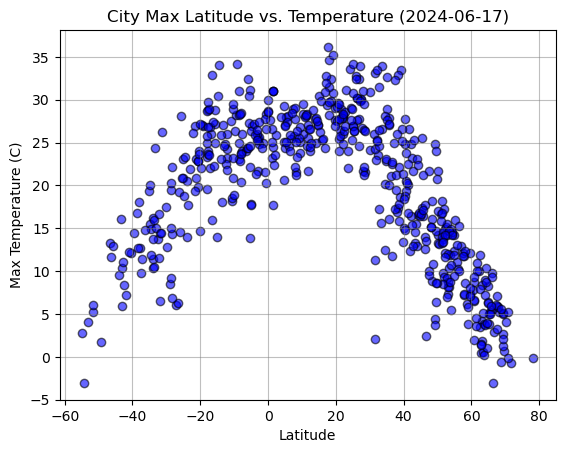

In [9]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df['Lat']
y_axis = city_data_df['Max Temp']

plt.scatter(x_axis, y_axis, alpha=0.6, color='blue', edgecolor='black')

# Incorporate the other graph properties

plt.grid(color='grey', alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Max Latitude vs. Temperature (2024-06-17)')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

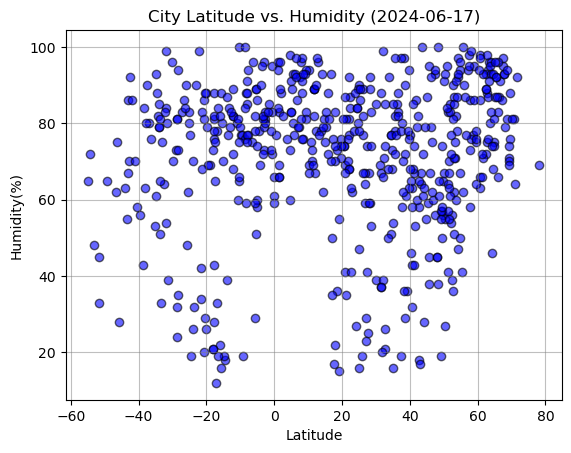

In [12]:
# Build the scatter plots for latitude vs. humidity
x_axis = city_data_df['Lat']
y_axis = city_data_df['Humidity']

plt.scatter(x_axis, y_axis, alpha=0.6, color='blue', edgecolor='black')

# Incorporate the other graph properties

plt.grid(color='grey', alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title('City Latitude vs. Humidity (2024-06-17)')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

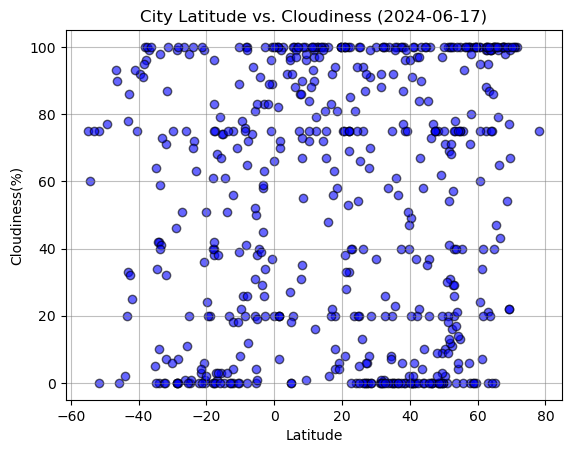

In [11]:
# Build the scatter plots for latitude vs. cloudiness
x_axis = city_data_df['Lat']
y_axis = city_data_df['Cloudiness']

plt.scatter(x_axis, y_axis, alpha=0.6, color='blue', edgecolor='black')

# Incorporate the other graph properties

plt.grid(color='grey', alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title('City Latitude vs. Cloudiness (2024-06-17)')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

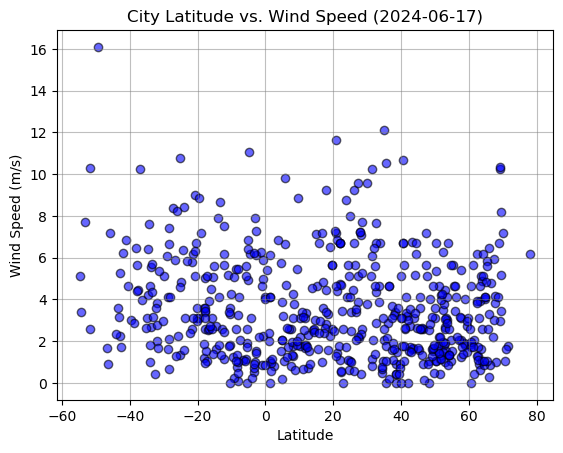

In [13]:
# Build the scatter plots for latitude vs. wind speed
x_axis = city_data_df['Lat']
y_axis = city_data_df['Wind Speed']

plt.scatter(x_axis, y_axis, alpha=0.6, color='blue', edgecolor='black')

# Incorporate the other graph properties

plt.grid(color='grey', alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed (2024-06-17)')


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [45]:
# Define a function to create Linear Regression plots

def linear_regression(x_values, y_values, y_label, eq_xy):

    # Run linear Regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {round(slope,2)}x + {round(intercept, 2)}"
    
    # Print r square value
    print(f"R squared: {rvalue**2}")

    # Plot scatter plot 
    plt.scatter(x_values, y_values, alpha=0.5, color='blue', edgecolor= 'black')

    # Plot regression line
    plt.plot(x_values, regress_values, color='red')
    plt.annotate(line_eq, eq_xy, fontsize=15, color='red')

    # Label plot 
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()



In [46]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,hibbing,47.4272,-92.9377,21.73,56,75,7.20,US,1726958153
3,namtsy,62.7161,129.6658,0.50,88,100,1.29,RU,1726958156
4,chernyshevskiy,63.0128,112.4714,1.80,94,95,0.90,RU,1726958157
10,petropavlovsk-kamchatsky,53.0452,158.6483,7.33,87,40,1.00,RU,1726957935
11,hawaiian paradise park,19.5933,-154.9731,27.63,76,100,2.57,US,1726958168


In [47]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waingapu,-9.6567,120.2641,26.36,77,22,1.24,ID,1726958152
2,port elizabeth,-33.9180,25.5701,16.16,79,0,4.63,ZA,1726958155
5,karratha,-20.7377,116.8463,19.82,86,99,9.02,AU,1726958159
6,port-aux-francais,-49.3500,70.2167,1.69,65,77,16.10,TF,1726957597
7,quellon,-43.1167,-73.6167,5.94,86,33,3.17,CL,1726957867


###  Temperature vs. Latitude Linear Regression Plot

R squared: 0.6995039015999835


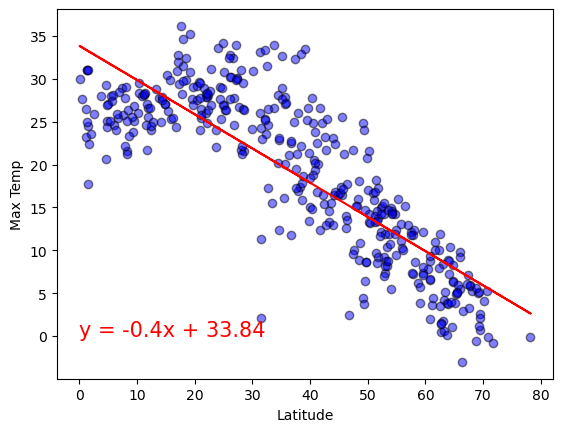

In [50]:
# Linear regression on Northern Hemisphere

linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 'Max Temp', (0,0))

R squared: 0.5982657035900326


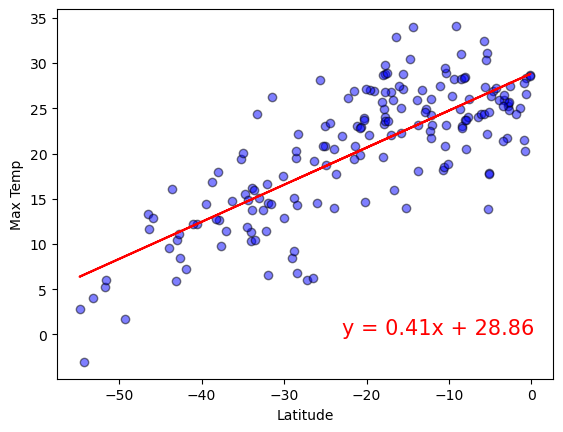

In [54]:
# Linear regression on Southern Hemisphere

linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], "Max Temp", (-23, 0))

### 

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

R squared: 0.0010152724482420594


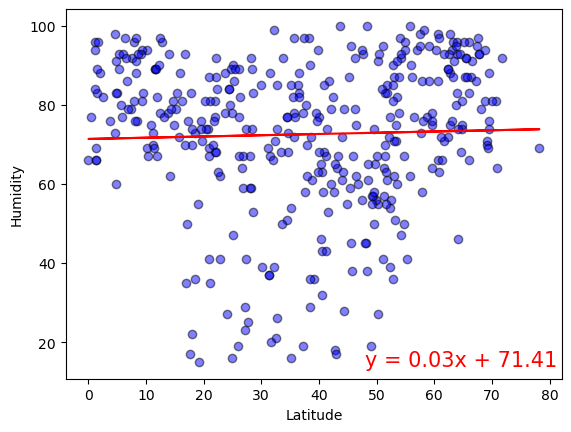

In [61]:
# Northern Hemisphere

linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], "Humidity", (48, 14))

R squared: 0.024724601756856517


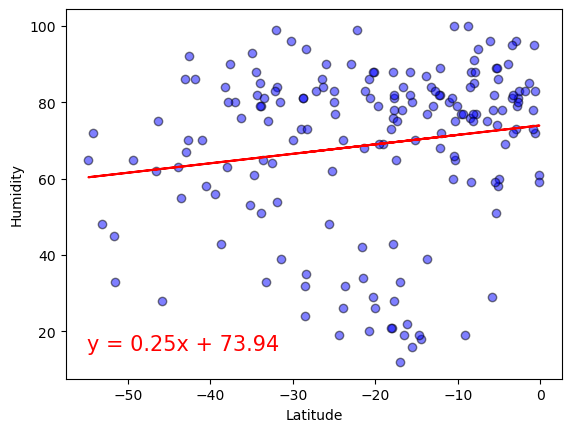

In [66]:
# Southern Hemisphere
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], "Humidity", (-55, 15))
                

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

R squared: 0.00033705351755698666


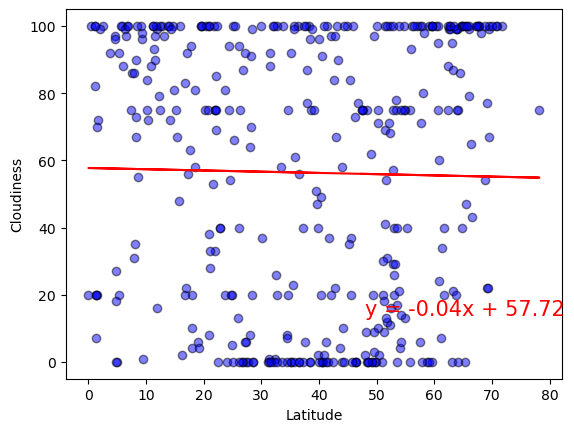

In [67]:
# Northern Hemisphere

linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], "Cloudiness", (48, 14))

R squared: 0.0009564494692451451


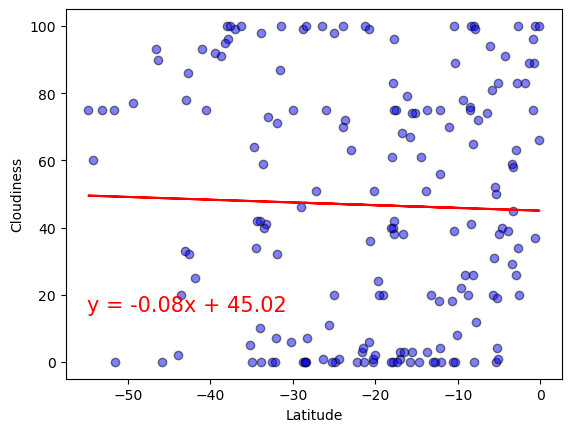

In [68]:
# Southern Hemisphere

linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], "Cloudiness", (-55, 15))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

R squared: 0.000689462268385482


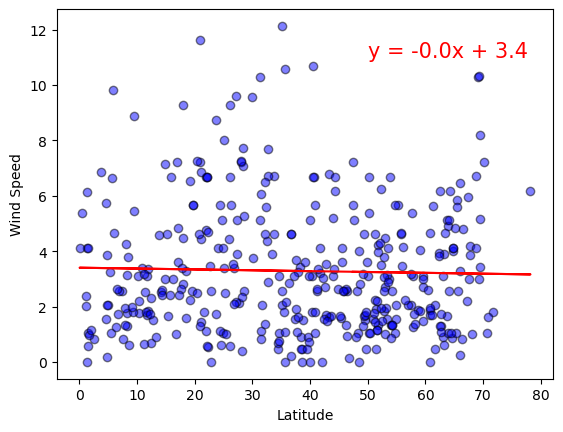

In [74]:
# Northern Hemisphere

linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], "Wind Speed", (50,11))

R squared: 0.050609849420048786


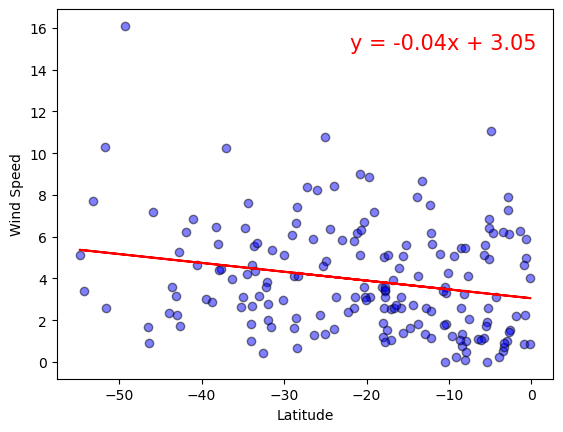

In [75]:
# Southern Hemisphere

linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], "Wind Speed", (-22, 15))

**Discussion about the linear relationship:** YOUR RESPONSE HERE